In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# For optimization using pygmo
import pygmo as pg
from udp_initial_condition import udp_initial_condition

# For Plotting
import matplotlib.pyplot as plt
from math import pi


In [51]:
# Setup problem hyperparameters:
body_density = 533           # https://sci.esa.int/web/rosetta/-/14615-comet-67p
target_altitude = 5000**2    # Target altitude squared
final_time = 20*3600.0       # Final time
start_time = 0               # Starting time
time_step = 600.0            # Time step size for trajectory propagation.
mu = 665.666                 # Gravitational parameter for 67P/C-G

# Defining the parameter space for the optimization
#   (Parameters are defined in osculating orbital elements)
a = [5000, 15000] # Semi-major axis
e = [0, 1]        # Eccentricity [0, 1]
o = [0, 2*pi]     # Right ascension of ascending node [0,2*pi]
w = [0, 2*pi]     # Argument of periapsis [0, 2*pi]
i = [0, pi]       # Inclination [0, pi] 
ea = [0, 2*pi]    # Eccentric anomaly [0, 2*pi]

lower_bounds = [a[0], e[0], i[0], o[0], w[0], ea[0]]
upper_bounds = [a[1], e[1], i[1], o[1], w[1], ea[1]]

# Optimization algorithm hyperparameters
population_size = 10 
number_of_generations = 32 

Physical dimension along x (UN-normalized):  5002.5703125 Km

   Gen:        Fevals:          Best:             F:            CR:            dx:            df:
      1             10        7.9e+06       0.854785       0.485464        246.013    1.03756e+09
      2             20        7.9e+06       0.854785       0.485464        246.013    1.03756e+09
      3             30        7.9e+06       0.854785       0.485464        94.3623    3.95956e+08
      4             40        7.9e+06       0.854785       0.485464        94.1974    1.12256e+08
      5             50        7.9e+06       0.854785       0.485464        94.1974    1.12256e+08
      6             60    7.64012e+06       0.854785       0.485464        94.5551    1.11076e+08
      7             70    4.95311e+06       0.508145       0.647988        4702.77    3.26086e+07
      8             80    4.95311e+06       0.508145       0.647988        4702.25    3.22752e+07
      9             90    4.95311e+06       0.508145    

BokehModel(combine_events=True, render_bundle={'docs_json': {'5d5495e7-135e-4d09-8d56-ceebfbcb348e': {'defs': …

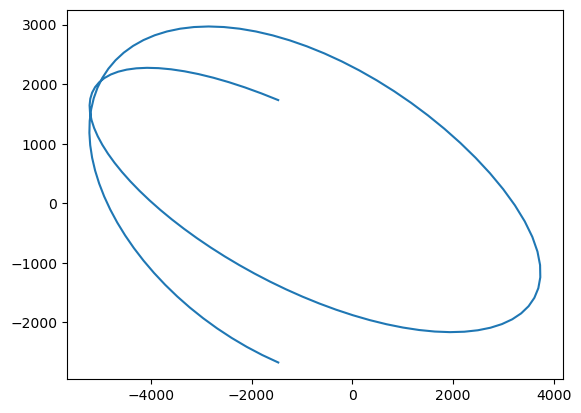

In [52]:
# Setup class
udp = udp_initial_condition(body_density, target_altitude, final_time, start_time, time_step, lower_bounds, upper_bounds, mu)

# Setup user defined problem (udp)
prob = pg.problem(udp)

# Setup optimization algorithm
algo = pg.algorithm(pg.sade(gen = number_of_generations))
pop = pg.population(prob = prob, size = population_size)

# Run optimization
algo.set_verbosity(1)
pop = algo.evolve(pop)

# Logs for output
print("Champion fitness value: ", pop.champion_f) 
print("Champion chromosome: ", pop.champion_x) 

# Retrieving champion chromosome
x = pop.champion_x

# Compute optimized trajectory
r_store, v_store, a_store = udp.compute_trajectory(x)

# Plot optimized trajectory
udp.plot_trajectory(r_store)
plt.plot(r_store[1],r_store[2]) 